In [1]:
import networkx
import math
import scipy.optimize
import numpy
from lib.time_graph import *
from lib.time_graph_signal_proc import *
from lib.vis import *
from lib.syn import *
from lib.io import *
from lib.datasets import *
from lib.time_graph import *
from lib.experiments import *
from IPython.display import Image

In [2]:
from datetime import datetime, date, time, timedelta
import statistics

def check_time_range_traffic(file_id, days, hours):
    start_time = datetime.strptime("1/04/11 00:00", "%d/%m/%y %H:%M")
    file_time = start_time + timedelta(minutes=int(file_id)*5)
   
    check_day = False
    
    for d in days:
        if file_time.weekday() == d:
            check_day = True
            break
    
    if check_day is False:
        return False
    
    check_hour = False
    
    for h in hours:
        if file_time.hour == h:
            check_hour = True
            break
            
    return check_hour

In [3]:
friday_snaps = []
days = [4]
hours=range(24)

for i in range(0, 8640):
    if check_time_range_traffic(i, days, hours):
        friday_snaps.append(i)
        
friday_snaps = numpy.array(friday_snaps)

friday_snaps = friday_snaps[12*12:12*24]

friday_snaps = friday_snaps[0::36]

In [4]:
sG = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic.data")

In [5]:
G = TimeGraph(0.)

for i in range(len(friday_snaps)):
    for e in sG.edges():
        G.add_edge(e[0], e[1], i)

In [6]:
F =  read_time_values(small_traffic["path"]+"traffic", G, friday_snaps)

In [7]:
tc = TemporalCuts("name", "diff-sparse")
c = tc.cut(G)
print(c)

{'cut': array([ 1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


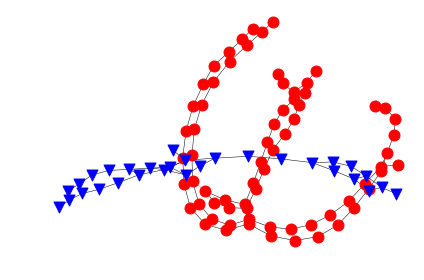

In [8]:
draw_time_graph_cut(G, "primary_school_td.svg", c["cut"])

In [8]:
c = temporal_graph_transform(G, F, 2, 0.)
#c = temporal_graph_transform(G, numpy.ones(Fshape[0]), .0001)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{'0': array([ 0.18250847, -0.15794278]),
 '86': array([ 0.30310487, -0.20965114]),
 '32': array([ 0.06987987, -0.0838195 ]),
 '25': array([ 0.4225651 , -0.23740256]),
 '15': array([-0.03598401,  0.01582715]),
 '1': array([-0.67924587,  0.32749639]),
 '12': array([-0.75949408,  0.37252969]),
 '38': array([-0.63020302,  0.35149615]),
 '58': array([-0.5970037 ,  0.27466767]),
 '87': array([-0.82077516,  0.42929772]),
 '17': array([-0.70000208,  0.43649227]),
 '48': array([-0.54186503,  0.26780126]),
 '22': array([-0.52596056,  0.23192355]),
 '2': array([-0.2243784 ,  0.13293801]),
 '72': array([-0.32404565,  0.20205026]),
 '62': array([-0.12201514,  0.03567913]),
 '90': array([-0.18259888,  0.1502331 ]),
 '7': array([-0.25037719,  0.21747988]),
 '36': array([-0.44670351,  0.22944968]),
 '43': array([-0.00229913,  0.10767679]),
 '81': array([-0.16954768, -0.09943115]),
 '68': array([-0.10839213,  0.05334948]),
 '3': array([-0.24898908, -0.80134115]),
 '84': array([-0.30572616, -0.83581881]

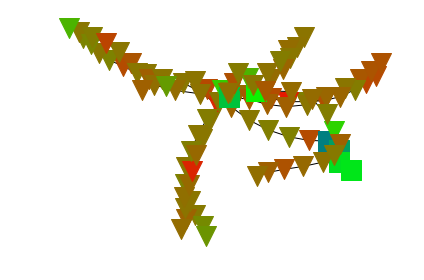

In [9]:
draw_time_graph_cut_values(G, c["assign"], F, "primary_school_td.svg")

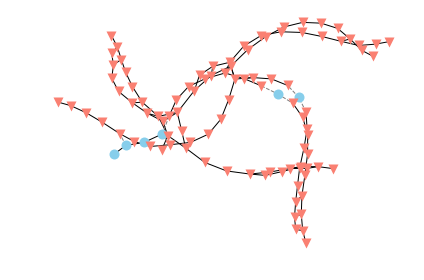

In [10]:
draw_time_graph_partitions(G, "primary_school_td.svg", c["assign"], False)

In [11]:
L2_error(F, c['transform'])

0.19050809628051743

In [8]:
K = [5, 10, 20, 40]

results = compression_experiments(G, F, K, 5)

In [9]:
results

array([[ 0.87305588,  0.70768239,  0.59836889,  0.46158191],
       [ 0.19189918,  0.17817595,  0.17081546,  0.15817729],
       [ 0.22343697,  0.21890282,  0.20816496,  0.18720717],
       [ 0.28669265,  0.27703713,  0.25879688,  0.23989775]])

In [2]:
K = [5, 10, 20, 40]

results = numpy.array([[ 0.87305588,  0.70768239,  0.59836889,  0.46158191],
       [ 0.1925559 ,  0.17970188,  0.16977256,  0.16329276],
       [ 0.23102427,  0.2132812 ,  0.19909818,  0.18990198],
       [ 0.28271556,  0.27284988,  0.26597022,  0.26199616]])

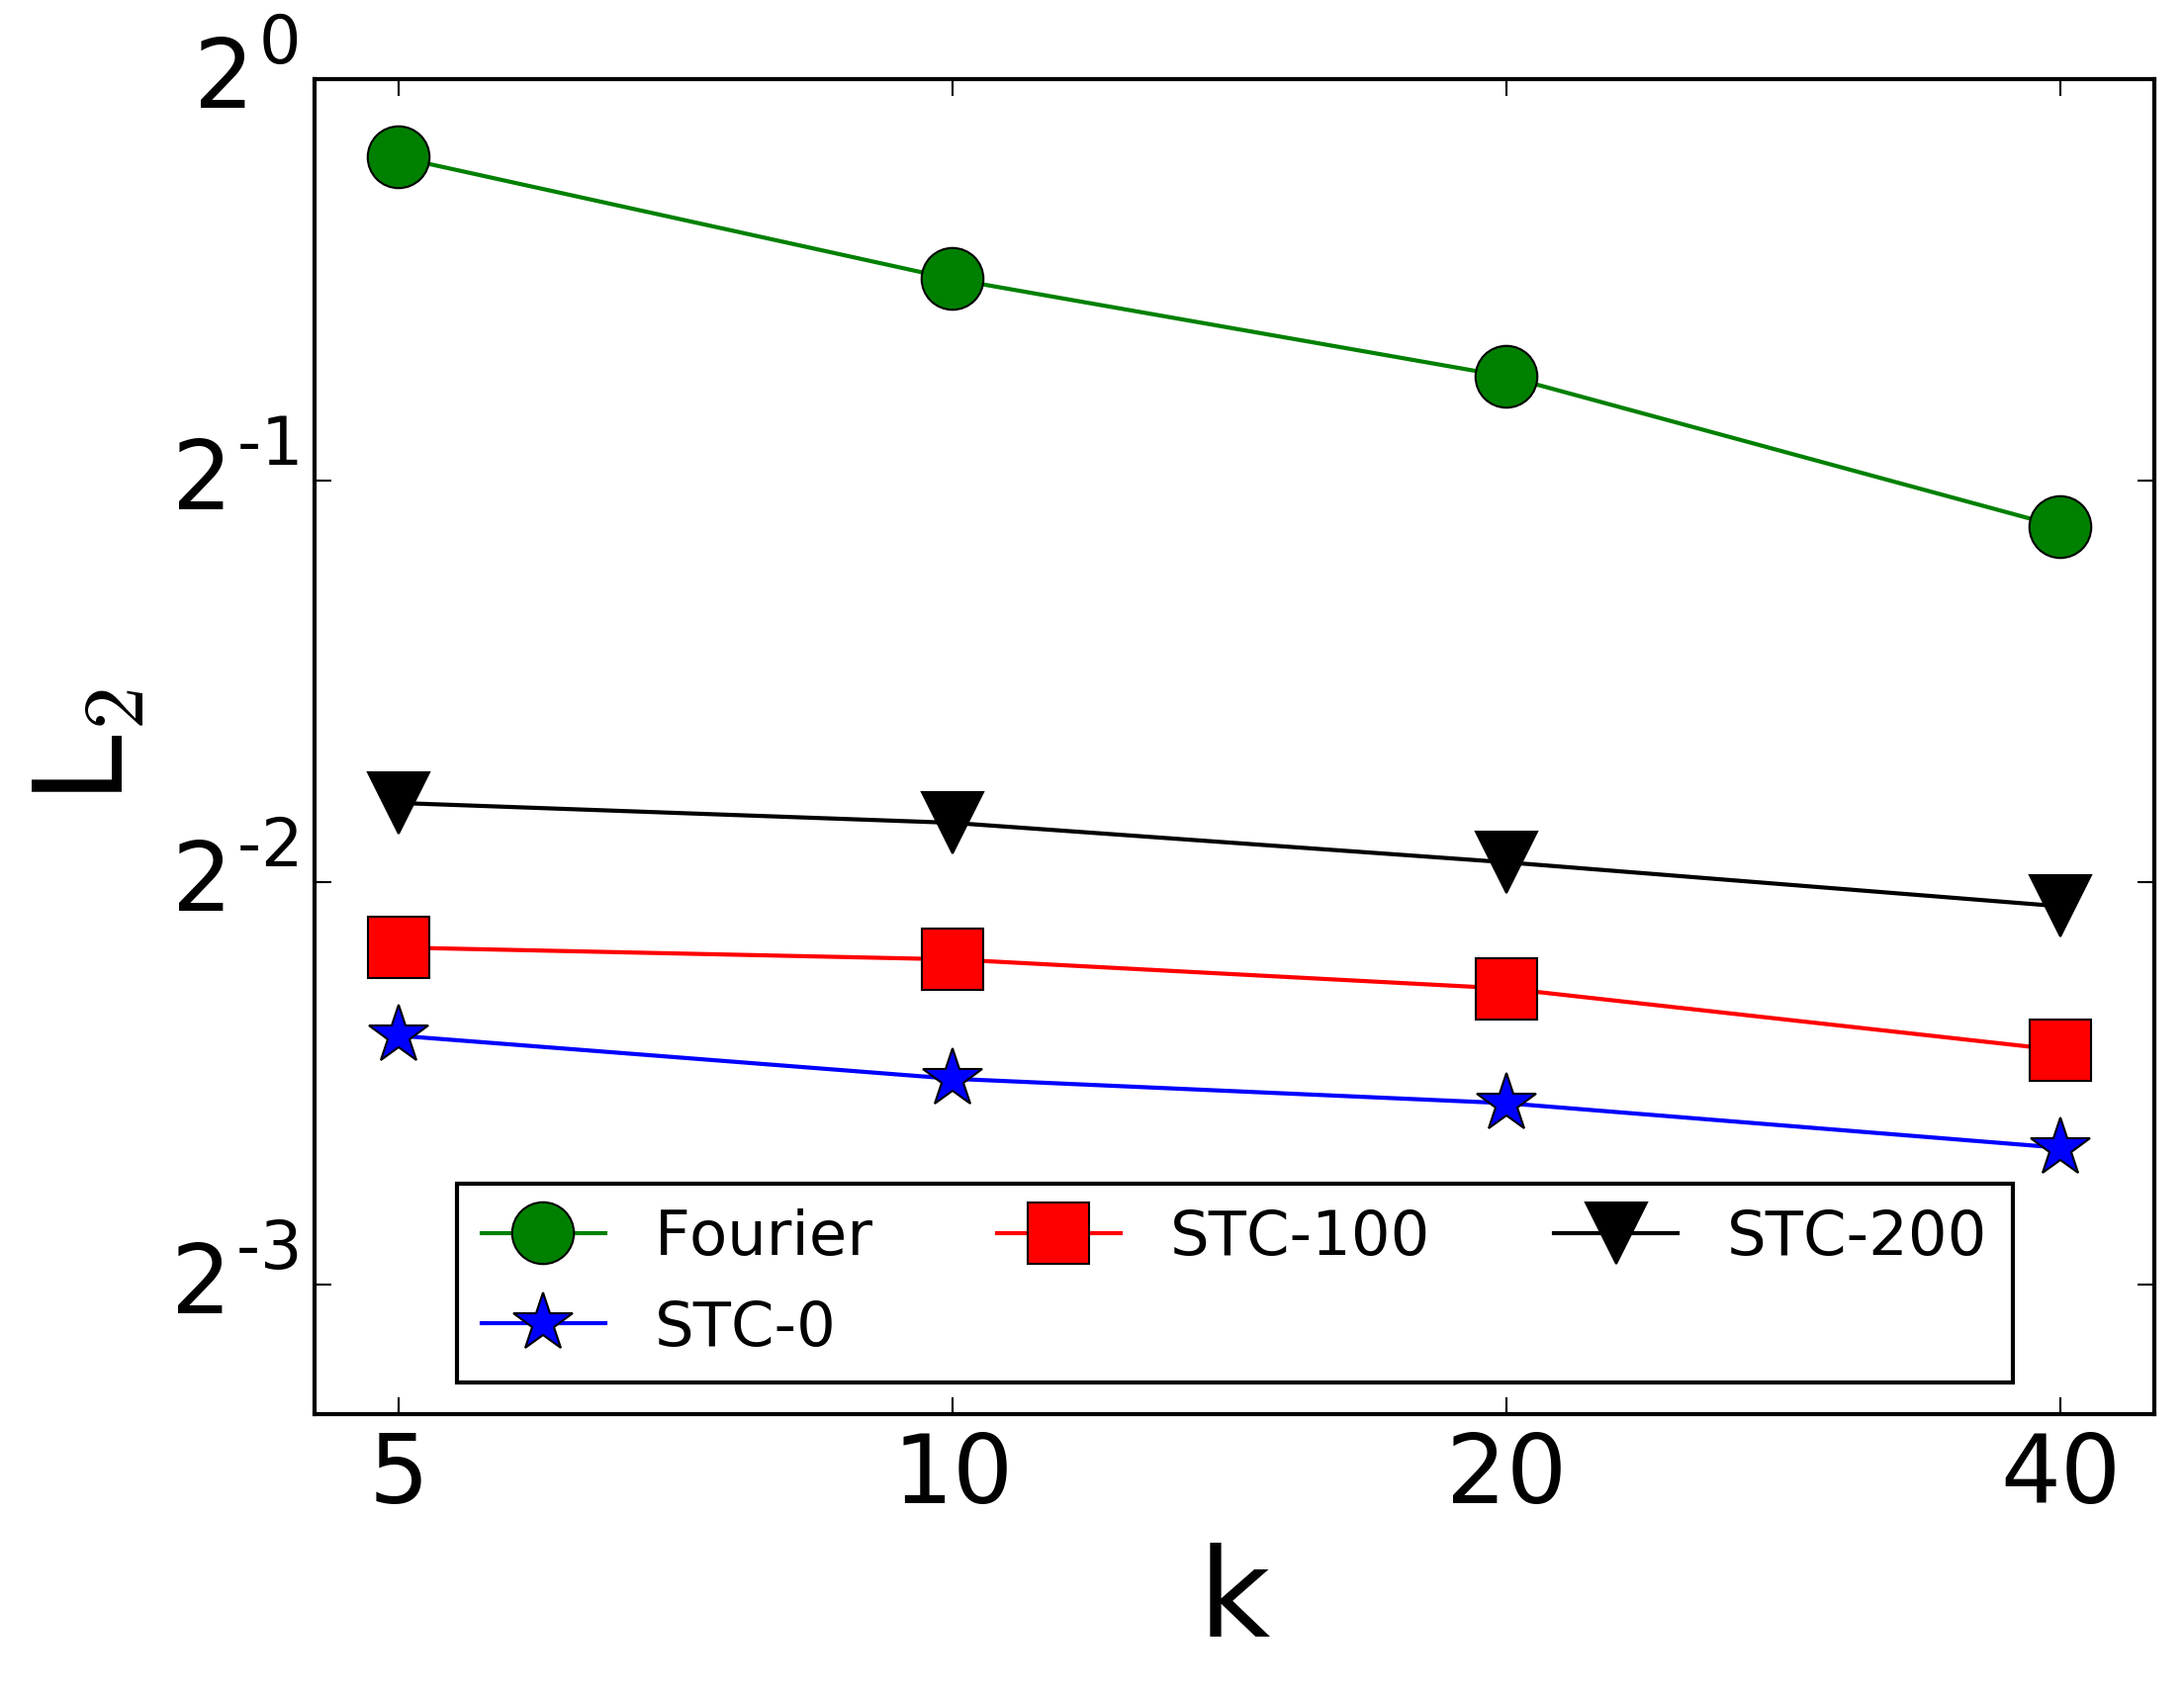

In [10]:
output_file_name = "figs/compression_traffic.png"
plot_compression_experiments(results, K, output_file_name, .9, 9, 0.1, 1.)
Image(filename=output_file_name)

In [12]:
G = read_time_graph(primary_school["graph"], 0.05)

F = generate_dyn_heat(G, 1, 15.)
F = F.flatten()

F = F - numpy.mean(F)
F = F / numpy.linalg.norm(F)

In [13]:
K = [5, 10, 20, 40]

results = compression_experiments(G, F, K, 5)

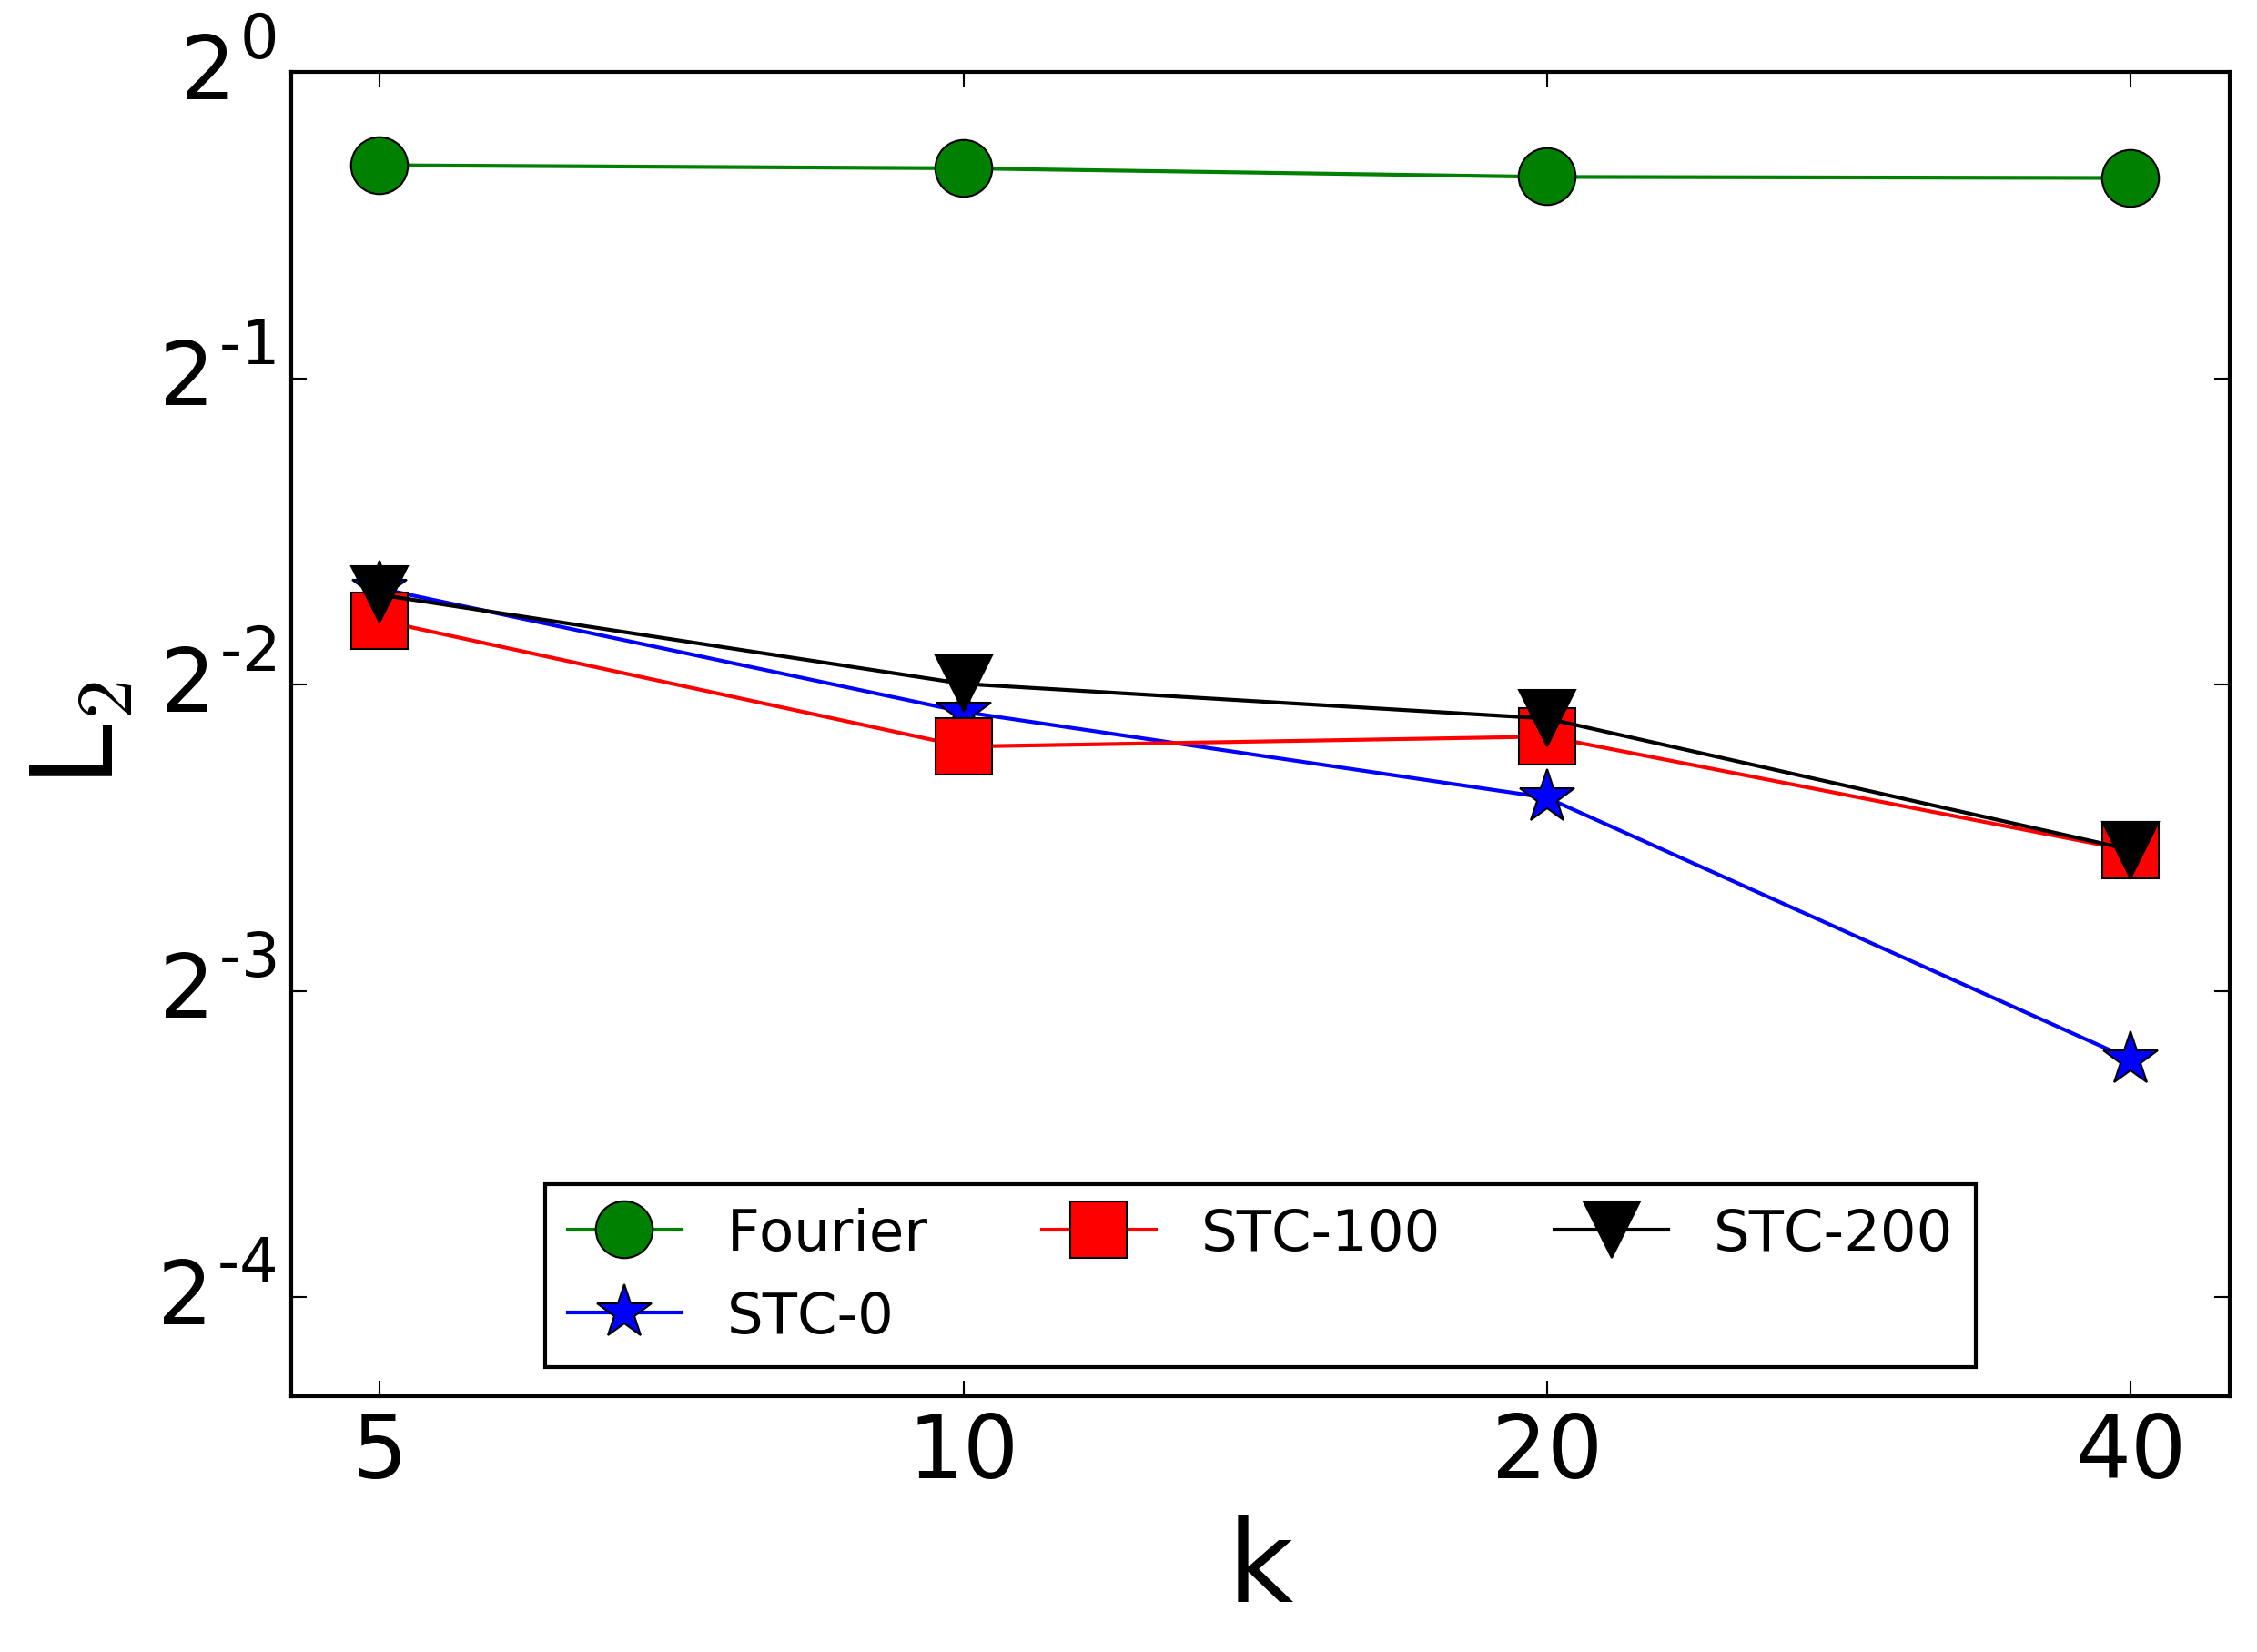

In [20]:
output_file_name = "figs/compression_heat.png"
plot_compression_experiments(results, K, output_file_name, .9, 9, 0.05,1.)
Image(filename=output_file_name)